In [1]:
import pandas as pd

In [2]:
df = pd.read_csv("Customer-Churn-Prediction.csv")

In [3]:
df.head(3)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes


In [4]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [5]:
df.shape

(7043, 21)

In [6]:
x = df.drop(["customerID","Churn"], axis=1)
y = df["Churn"]

In [7]:
x.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65


In [8]:
x.isna().sum()

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
dtype: int64

In [9]:
y.value_counts()

Churn
No     5174
Yes    1869
Name: count, dtype: int64

In [10]:
per_no = 5174/ (5174+1869) * 100
print(per_no)

73.4630129206304


In [11]:
per_yes = 1869/ (5174+1869) * 100
print(per_yes)

26.536987079369588


In [12]:
from pandas.core.dtypes.common import is_numeric_dtype
from sklearn.preprocessing import LabelEncoder

In [13]:
from pandas.core.dtypes.common import is_numeric_dtype
from sklearn.preprocessing import LabelEncoder

for col in df.columns:
    if is_numeric_dtype(df[col]):
        continue
    else:
        le = LabelEncoder()
        df[col] = le.fit_transform(df[col])

In [14]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,5375,0,0,1,0,1,0,1,0,0,...,0,0,0,0,0,1,2,29.85,2505,0
1,3962,1,0,0,0,34,1,0,0,2,...,2,0,0,0,1,0,3,56.95,1466,0
2,2564,1,0,0,0,2,1,0,0,2,...,0,0,0,0,0,1,3,53.85,157,1
3,5535,1,0,0,0,45,0,1,0,2,...,2,2,0,0,1,0,0,42.30,1400,0
4,6511,0,0,0,0,2,1,0,1,0,...,0,0,0,0,0,1,2,70.70,925,1


In [15]:
x = df.drop(["customerID","Churn"], axis=1)
y = df["Churn"]

In [16]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest= train_test_split(x,y, test_size=.25, random_state=10)

# SMOTE

In [18]:
#!pip install imblearn

In [19]:
from imblearn.combine import SMOTETomek

In [20]:
sm = SMOTETomek(random_state=100)
new_x, new_y= sm.fit_resample(x,y)

In [21]:
y.value_counts()

Churn
0    5174
1    1869
Name: count, dtype: int64

In [22]:
new_y.value_counts()

Churn
0    4826
1    4826
Name: count, dtype: int64

In [23]:
x_train, x_test,y_train,y_test=train_test_split(new_x,new_y, test_size=.2, random_state=10)

In [24]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()

In [25]:
rf.fit(xtrain,ytrain)

RandomForestClassifier()

In [26]:
rf.score(xtrain,ytrain)

0.9979174555092768

In [27]:
rf.score(xtest,ytest)

0.7955706984667802

In [28]:
# Predictions on test data
ypred = rf.predict(xtest)

In [30]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [31]:
# Accuracy on test data
accuracy = accuracy_score(ytest, ypred)
print("Test Accuracy:", accuracy)

Test Accuracy: 0.7955706984667802


In [35]:
# Confusion matrix
cm = confusion_matrix(ytest, ypred)
print("Confusion Matrix:\n", cm)

Confusion Matrix:
 [[1176  132]
 [ 228  225]]


In [32]:
# Classification report
cr = classification_report(ytest, ypred)
print("Classification Report:\n", cr)

Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.90      0.87      1308
           1       0.63      0.50      0.56       453

    accuracy                           0.80      1761
   macro avg       0.73      0.70      0.71      1761
weighted avg       0.78      0.80      0.79      1761



In [33]:
import seaborn as sns
import matplotlib.pyplot as plt

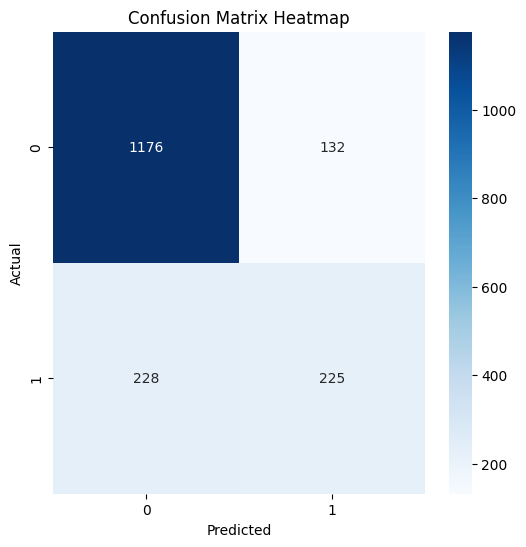

In [37]:
# Heatmap for confusion matrix
plt.figure(figsize=(6,6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix Heatmap')
plt.show()

# after over sampling

In [38]:
rf.fit(x_train,y_train)

RandomForestClassifier()

In [39]:
# Score on training data
score = rf.score(x_train, y_train)
print("Training Score:", score)

Training Score: 0.9983162802745759


In [40]:
# Score on test data
score = rf.score(x_test,y_test)
print("Test Score:", score)

Test Score: 0.865872604867944


In [41]:
# Predictions on test data
y_pred = rf.predict(x_test)

In [42]:
# Accuracy on test data
accuracy = accuracy_score(y_test, y_pred)
print("Test Accuracy:", accuracy)

Test Accuracy: 0.865872604867944


In [43]:
# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", cm)

Confusion Matrix:
 [[863 126]
 [133 809]]


In [44]:
# Classification report
cr = classification_report(y_test, y_pred)
print("Classification Report:\n", cr)

Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.87      0.87       989
           1       0.87      0.86      0.86       942

    accuracy                           0.87      1931
   macro avg       0.87      0.87      0.87      1931
weighted avg       0.87      0.87      0.87      1931



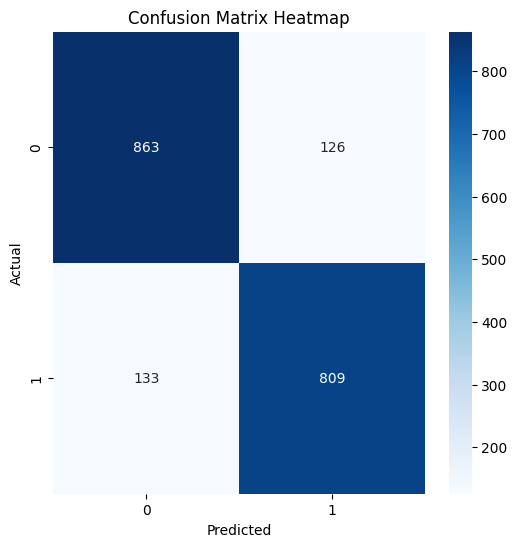

In [46]:
# Heatmap for confusion matrix
plt.figure(figsize=(6,6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix Heatmap')
plt.show()

# over sampler

In [47]:
y.value_counts()

Churn
0    5174
1    1869
Name: count, dtype: int64

In [48]:
from imblearn.over_sampling import RandomOverSampler

In [49]:
rof = RandomOverSampler()

In [50]:
y.value_counts()

Churn
0    5174
1    1869
Name: count, dtype: int64

In [53]:
x.value_counts()

gender  SeniorCitizen  Partner  Dependents  tenure  PhoneService  MultipleLines  InternetService  OnlineSecurity  OnlineBackup  DeviceProtection  TechSupport  StreamingTV  StreamingMovies  Contract  PaperlessBilling  PaymentMethod  MonthlyCharges  TotalCharges
1       0              0        0           1       1             0              2                1               1             1                 1            1            1                0         0                 3              20.20           1610            4
0       0              0        0           1       1             0              2                1               1             1                 1            1            1                0         0                 3              19.90           1492            3
1       0              0        0           1       1             0              1                0               0             0                 0            0            0                0         1       

In [54]:
newx, newy = rof.fit_resample(x,y)

In [55]:
newy.value_counts()

Churn
0    5174
1    5174
Name: count, dtype: int64

In [56]:
xtrain,xtest,ytrain,ytest=train_test_split(newx,newy, test_size=.2, random_state=10)

In [57]:
rf.fit(xtrain,ytrain)

RandomForestClassifier()

In [58]:
# Score on training data
score = rf.score(xtrain, ytrain)
print("Training Score:", score)

Training Score: 0.9984295723604736


In [59]:
# Score on test data
score = rf.score(xtest, ytest)
print("Training Score:", score)

Training Score: 0.9014492753623189


In [60]:
# Predictions on test data
ypred = rf.predict(xtest)

In [62]:
# Accuracy on test data
accuracy = accuracy_score(ytest, ypred)
print("Test Accuracy:", accuracy)

Test Accuracy: 0.9014492753623189


In [63]:
# Confusion matrix
cm = confusion_matrix(ytest, ypred)
print("Confusion Matrix:\n", cm)

Confusion Matrix:
 [[896 161]
 [ 43 970]]


In [64]:
# Classification report
cr = classification_report(ytest, ypred)
print("Classification Report:\n", cr)

Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.85      0.90      1057
           1       0.86      0.96      0.90      1013

    accuracy                           0.90      2070
   macro avg       0.91      0.90      0.90      2070
weighted avg       0.91      0.90      0.90      2070



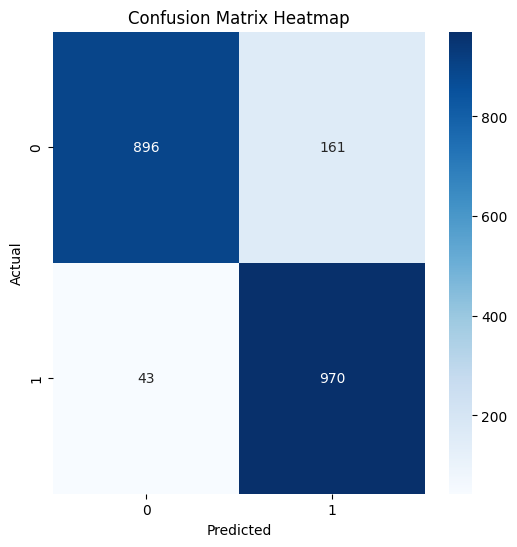

In [65]:
# Heatmap for confusion matrix
plt.figure(figsize=(6,6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix Heatmap')
plt.show()

# Undersampling

In [66]:
from imblearn.under_sampling import RandomUnderSampler

In [67]:
rns = RandomUnderSampler()
xnew, ynew = rns.fit_resample(x,y)

In [68]:
ynew.value_counts()

Churn
0    1869
1    1869
Name: count, dtype: int64

In [69]:
xnewtrain,xnewtest,ynewtrain,ynewtest=train_test_split(xnew,ynew, test_size=.2, random_state=10)

In [70]:
rf.fit(xnewtrain,ynewtrain)

RandomForestClassifier()

In [71]:
# Score on training data
score = rf.score(xnewtrain, ynewtrain)
print("Training Score:", score)

Training Score: 0.9983277591973244


In [72]:
# Score on test data
score = rf.score(xnewtest, ynewtest)
print("Test Score:", score)

Test Score: 0.7954545454545454


In [73]:
# Predictions on test data
ypred = rf.predict(xnewtest)

In [74]:
# Accuracy on test data
accuracy = accuracy_score(ynewtest, ypred)
print("Test Accuracy:", accuracy)

Test Accuracy: 0.7954545454545454


In [75]:
# Confusion matrix
cm = confusion_matrix(ynewtest, ypred)
print("Confusion Matrix:\n", cm)

Confusion Matrix:
 [[315  84]
 [ 69 280]]


In [76]:
# Classification report
cr = classification_report(ynewtest, ypred)
print("Classification Report:\n", cr)

Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.79      0.80       399
           1       0.77      0.80      0.79       349

    accuracy                           0.80       748
   macro avg       0.79      0.80      0.80       748
weighted avg       0.80      0.80      0.80       748



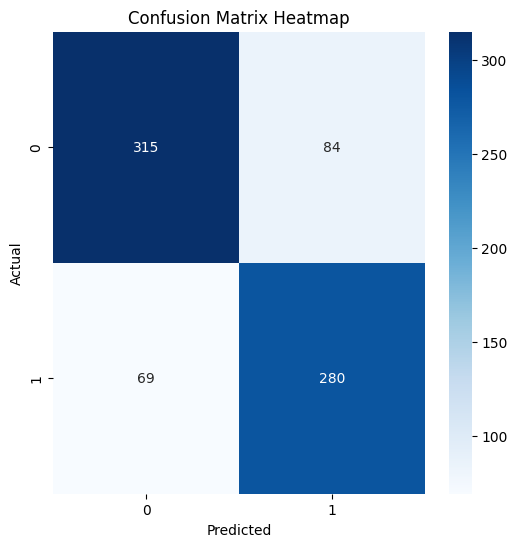

In [78]:
# Heatmap for confusion matrix
plt.figure(figsize=(6,6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix Heatmap')
plt.show()

# cross validaton

## K-fold cross validation

In [79]:
from sklearn.model_selection import KFold, cross_val_score

In [80]:
kifol = KFold(n_splits=5)

In [81]:
result = cross_val_score(rf, x,y, cv=kifol)

In [82]:
result

array([0.78992193, 0.79701916, 0.79063165, 0.7890625 , 0.78835227])

In [83]:
result.mean()

0.7909975038712174

In [84]:
from sklearn.model_selection import StratifiedKFold

In [85]:
sts = StratifiedKFold(n_splits=5)

In [86]:
result = cross_val_score(rf, x,y, cv=sts)

In [87]:
result

array([0.79843861, 0.78495387, 0.77004968, 0.79900568, 0.79332386])

In [88]:
result.mean()

0.7891543406026196

In [89]:
xtrain,xtest,ytrain,ytest = train_test_split(x,y , test_size=.2, random_state=42)

In [90]:
rfor = RandomForestClassifier()

In [91]:
rfor.fit(xtrain,ytrain)

RandomForestClassifier()

In [92]:
print(rfor.score(xtest,ytest))

0.7977288857345636


In [93]:
print(rfor.score(xtrain,ytrain))

0.9985800496982605


In [94]:
pred= rfor.predict(xtest)

In [95]:
cm = confusion_matrix(ytest,pred)
print(cm)

[[950  86]
 [199 174]]


In [96]:
class_re = classification_report(ytest,pred)

In [97]:
print(class_re)

              precision    recall  f1-score   support

           0       0.83      0.92      0.87      1036
           1       0.67      0.47      0.55       373

    accuracy                           0.80      1409
   macro avg       0.75      0.69      0.71      1409
weighted avg       0.79      0.80      0.78      1409



<Axes: >

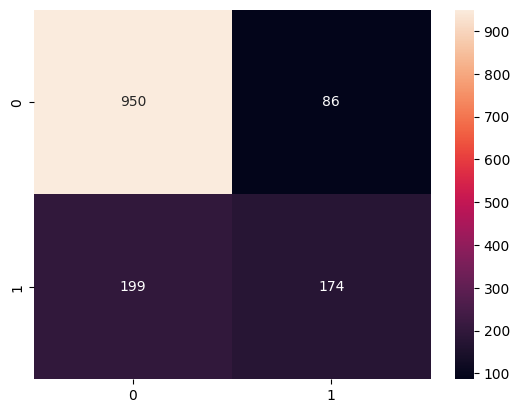

In [98]:
sns.heatmap(cm, annot=True, fmt='g')

In [108]:
cus_ron= RandomForestClassifier(oob_score=True, n_estimators=50, bootstrap=True, random_state=42)

In [109]:
cus_ron.fit(xtrain,ytrain)

RandomForestClassifier(n_estimators=50, oob_score=True, random_state=42)

In [110]:
cus_ron.score(xtrain,ytrain)

0.9978700745473909

In [111]:
cus_ron.score(xtest,ytest)

0.794889992902768

In [122]:
# Predict on training data
y_pred = cus_ron.predict(xtrain)

In [124]:
# Accuracy score
accuracy = accuracy_score(ytrain, y_pred)
print(f"Accuracy: {accuracy}")

Accuracy: 0.9978700745473909


In [125]:
# Confusion Matrix
cm = confusion_matrix(ytrain, y_pred)
print("\nConfusion Matrix:")
print(cm)


Confusion Matrix:
[[4132    6]
 [   6 1490]]


In [126]:
# Classification Report
print("\nClassification Report:")
print(classification_report(ytrain, y_pred))


Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      4138
           1       1.00      1.00      1.00      1496

    accuracy                           1.00      5634
   macro avg       1.00      1.00      1.00      5634
weighted avg       1.00      1.00      1.00      5634



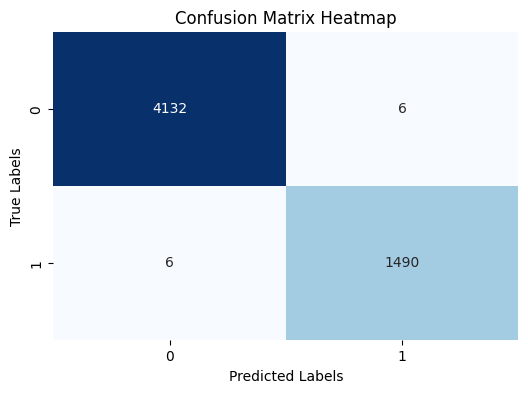

In [127]:
# Heatmap of Confusion Matrix
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix Heatmap')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

# parameter optimization

In [112]:
param_grid = {
    "n_estimators": [50, 100, 200],
    "criterion": ['gini', 'entropy'],
    "max_depth": [None, 10, 20],
    "min_samples_split": [2, 5, 10],
    "min_samples_leaf": [1, 2, 5],
    "max_features": ["sqrt", "log2"]  # removed "auto"
}

In [104]:
from sklearn.model_selection import GridSearchCV

In [119]:
gr_rf_se = GridSearchCV(estimator=cus_ron, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)

In [120]:
gr_rf_se

GridSearchCV(cv=5,
             estimator=RandomForestClassifier(n_estimators=50, oob_score=True,
                                              random_state=42),
             n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [None, 10, 20],
                         'max_features': ['sqrt', 'log2'],
                         'min_samples_leaf': [1, 2, 5],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [50, 100, 200]},
             verbose=2)

In [121]:
gr_rf_se.fit(xtrain, ytrain)

Fitting 5 folds for each of 324 candidates, totalling 1620 fits


GridSearchCV(cv=5,
             estimator=RandomForestClassifier(n_estimators=50, oob_score=True,
                                              random_state=42),
             n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [None, 10, 20],
                         'max_features': ['sqrt', 'log2'],
                         'min_samples_leaf': [1, 2, 5],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [50, 100, 200]},
             verbose=2)

In [128]:
print(gr_rf_se.best_params_)

{'criterion': 'entropy', 'max_depth': 10, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 100}


In [129]:
print(gr_rf_se.best_estimator_.oob_score_)

0.8006744763933262


In [130]:
# Define the parameter distribution
param_dist = {
    "n_estimators": [50, 100, 200, 300],
    "criterion": ['gini', 'entropy'],
    "max_depth": [None, 10, 20, 30, 40],
    "min_samples_split": [2, 5, 10],
    "min_samples_leaf": [1, 2, 5, 10],
    "max_features": ["sqrt", "log2"]
}

In [132]:
from sklearn.model_selection import RandomizedSearchCV

In [133]:
# Set up Randomized Search with 5-fold cross-validation
rand_rf_se = RandomizedSearchCV(
    estimator=cus_ron,
    param_distributions=param_dist,
    n_iter=20,        # number of random combinations to try
    cv=5,             # 5-fold cross-validation
    n_jobs=-1,        # use all processors
    random_state=42,  # reproducibility
    verbose=2         # print progress
)

In [134]:
# Fit Random Search on training data
rand_rf_se.fit(xtrain, ytrain)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5,
                   estimator=RandomForestClassifier(n_estimators=50,
                                                    oob_score=True,
                                                    random_state=42),
                   n_iter=20, n_jobs=-1,
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': [None, 10, 20, 30, 40],
                                        'max_features': ['sqrt', 'log2'],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [50, 100, 200, 300]},
                   random_state=42, verbose=2)

In [135]:
# Print the best parameters found
print("Best Parameters:", rand_rf_se.best_params_)

Best Parameters: {'n_estimators': 100, 'min_samples_split': 5, 'min_samples_leaf': 5, 'max_features': 'sqrt', 'max_depth': 40, 'criterion': 'entropy'}


In [136]:
# Print the Out-of-Bag (OOB) score of the best estimator
print("Best Estimator OOB Score:", rand_rf_se.best_estimator_.oob_score_)

Best Estimator OOB Score: 0.7983670571529996


In [140]:
# Check the available keys in the cv_results_
print("\nKeys in cv_results_: ", rand_rf_se.cv_results_.keys())


Keys in cv_results_:  dict_keys(['mean_fit_time', 'std_fit_time', 'mean_score_time', 'std_score_time', 'param_n_estimators', 'param_min_samples_split', 'param_min_samples_leaf', 'param_max_features', 'param_max_depth', 'param_criterion', 'params', 'split0_test_score', 'split1_test_score', 'split2_test_score', 'split3_test_score', 'split4_test_score', 'mean_test_score', 'std_test_score', 'rank_test_score'])


In [137]:
# Plotting the feature importances of the best model
best_rf = rand_rf_se.best_estimator_
feature_importances = best_rf.feature_importances_

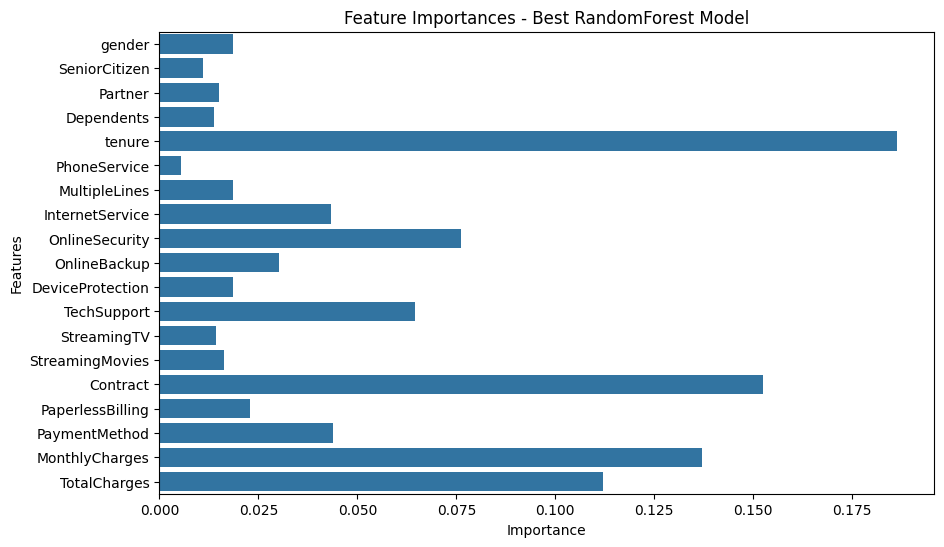

In [138]:
# Create a bar chart for feature importances
plt.figure(figsize=(10, 6))
sns.barplot(x=feature_importances, y=xtrain.columns)
plt.title("Feature Importances - Best RandomForest Model")
plt.xlabel("Importance")
plt.ylabel("Features")
plt.show()

# Visualizing Random Search Results with a Scatter Plot (parameter vs performance)

In [141]:
results = rand_rf_se.cv_results_

# Checking the structure of cv_results_
print("\nRandomized Search CV Results Example: ", results['params'][:5])  # Show a few examples of parameter sets


Randomized Search CV Results Example:  [{'n_estimators': 50, 'min_samples_split': 10, 'min_samples_leaf': 2, 'max_features': 'log2', 'max_depth': 30, 'criterion': 'entropy'}, {'n_estimators': 100, 'min_samples_split': 10, 'min_samples_leaf': 10, 'max_features': 'log2', 'max_depth': 40, 'criterion': 'gini'}, {'n_estimators': 200, 'min_samples_split': 2, 'min_samples_leaf': 2, 'max_features': 'log2', 'max_depth': 30, 'criterion': 'gini'}, {'n_estimators': 100, 'min_samples_split': 5, 'min_samples_leaf': 5, 'max_features': 'sqrt', 'max_depth': 40, 'criterion': 'entropy'}, {'n_estimators': 300, 'min_samples_split': 10, 'min_samples_leaf': 1, 'max_features': 'log2', 'max_depth': 40, 'criterion': 'entropy'}]


In [142]:
# Extracting mean test scores and parameter combinations
mean_test_scores = results['mean_test_score']
param_sets = results['params']

In [143]:
# Converting parameter sets into separate lists for easy plotting
param1_values = [param['n_estimators'] for param in param_sets]
param2_values = [param['max_depth'] for param in param_sets]

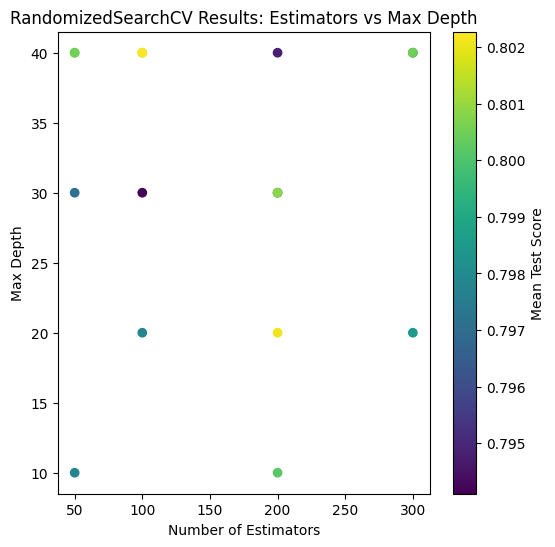

In [145]:
# Plotting the results of the RandomizedSearchCV
plt.figure(figsize=(6, 6))
scatter = plt.scatter(param1_values, param2_values, c=mean_test_scores, cmap='viridis')
plt.colorbar(scatter, label='Mean Test Score')
plt.xlabel('Number of Estimators')
plt.ylabel('Max Depth')
plt.title('RandomizedSearchCV Results: Estimators vs Max Depth')
plt.show()

In [147]:
# 1. Standard deviation of test scores
std_test_scores = results['std_test_score']

# 2. Mean fit time (how long it took to fit the model for each parameter set)
mean_fit_times = results['mean_fit_time']

# 3. Mean score time (how long it took to score the model for each parameter set)
mean_score_times = results['mean_score_time']

# 4. Number of fit times (number of times the model was fitted)
params = results['params']

# Print some of the additional results
print(f"Standard Deviation of Test Scores: {std_test_scores[:5]}")  # Print first 5 values
print(f"Mean Fit Time: {mean_fit_times[:5]}")  # Print first 5 values
print(f"Mean Score Time: {mean_score_times[:5]}")  # Print first 5 values

Standard Deviation of Test Scores: [0.00994348 0.00822277 0.00890025 0.00829471 0.00991493]
Mean Fit Time: [0.74454794 1.17049761 2.78995204 1.43392968 4.55013494]
Mean Score Time: [0.02593741 0.03822384 0.08427882 0.03958769 0.11571546]


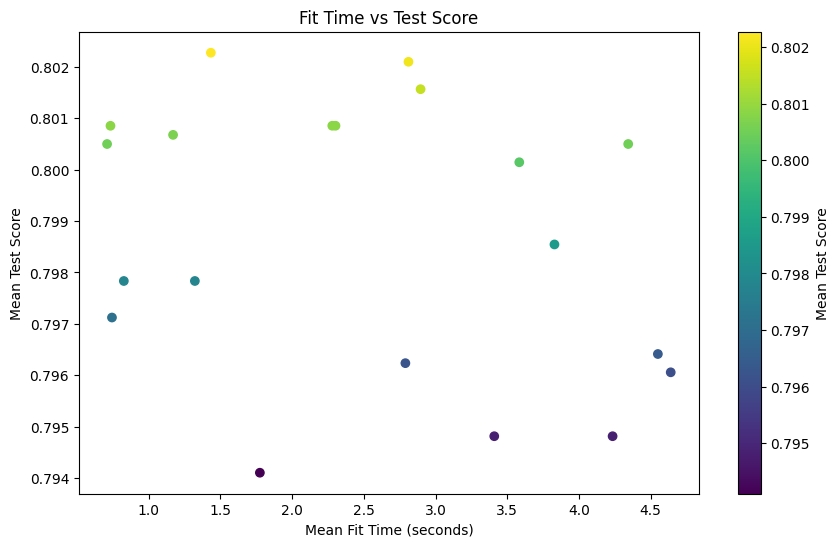

In [148]:
# Create a plot for mean fit time vs. mean test score
plt.figure(figsize=(10, 6))
plt.scatter(mean_fit_times, mean_test_scores, c=mean_test_scores, cmap='viridis')
plt.colorbar(label='Mean Test Score')
plt.xlabel('Mean Fit Time (seconds)')
plt.ylabel('Mean Test Score')
plt.title('Fit Time vs Test Score')
plt.show()

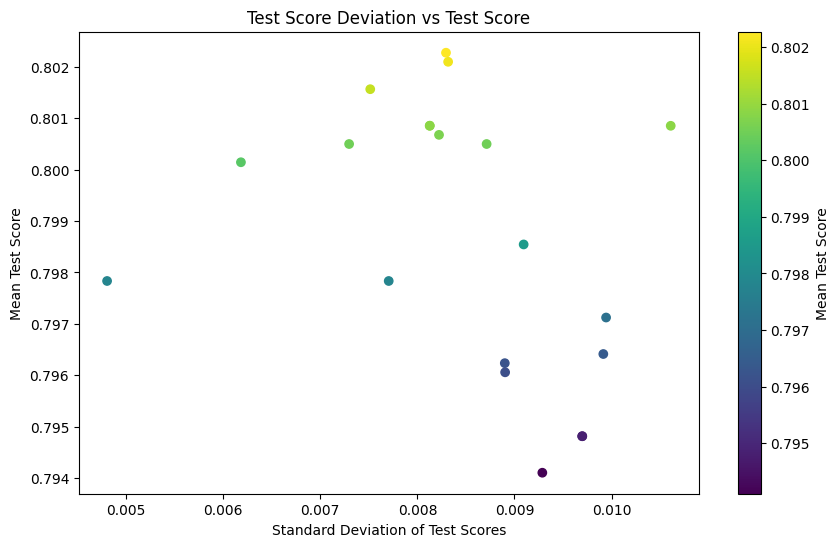

In [149]:
# Create a plot for standard deviation of test scores vs. mean test score
plt.figure(figsize=(10, 6))
plt.scatter(std_test_scores, mean_test_scores, c=mean_test_scores, cmap='viridis')
plt.colorbar(label='Mean Test Score')
plt.xlabel('Standard Deviation of Test Scores')
plt.ylabel('Mean Test Score')
plt.title('Test Score Deviation vs Test Score')
plt.show()

In [150]:
# Performance Evaluation on Test Set
y_pred = rand_rf_se.predict(xtest)  
accuracy = accuracy_score(ytest, y_pred)
print(f"Test Set Accuracy: {accuracy:.4f}")

Test Set Accuracy: 0.8098
